In [3]:
import matplotlib.pyplot as plt
plt.style.use('/home/gridsan/gschuette/universal/matplotlib/plot_style.txt')
import matplotlib.patheffects as pe
import sys
sys.path.insert(0,'../data_utils/')
from HiCDataset import HiCDataset

In [4]:
class MapCompare:

    def __init__(
        self,
        cooler_IMR90='../../data/outside/IMR90_hg19.mcool',
        cooler_GM12828='../../data/outside/GM12878_hg19.mcool',
        resolution=20_000,
        region_length=1_280_000
    ):

        self.imr = HiCDataset(cooler_IMR90,resolution)
        self.gm = HiCDataset(cooler_GM12828,resolution)
        self.resolution = resolution
        self.region_length = region_length

    def __call__(
        self,
        chrom=None,
        start_idx=None,
        region_length=None,
        balance=True,
        adaptive_coarsegraining=False,
        adaptive_coarsegraining_cutoff=3,
        adaptive_coarsegraining_max_levels=8,
        interp_nans=False,
        vmin=None,
        vmax=1,
        cmap='fall'
    ):

        if start_idx is None:
            stop = None
        elif region_length is None:
            stop = start_idx + self.region_length
        else:
            stop = start_idx + region_length
        
        gm_map = self.gm.fetch(
            chrom,
            start_idx,
            stop,
            balance,
            adaptive_coarsegraining,
            adaptive_coarsegraining_cutoff,
            adaptive_coarsegraining_max_levels,
            interp_nans
        )

        imr_map = self.imr.fetch(
            chrom,
            start_idx,
            stop,
            balance,
            adaptive_coarsegraining,
            adaptive_coarsegraining_cutoff,
            adaptive_coarsegraining_max_levels,
            interp_nans
        )

        fig,ax,im,cbar = imr_map.plot_with(gm_map,vmin=vmin,vmax=vmax,cmap=cmap)

        num_bins = ax.get_xlim()[-1]
        
        ax.text(num_bins-1,.01*num_bins,'IMR90',horizontalalignment='right',verticalalignment='top',
                color='black',path_effects=[pe.withStroke(linewidth=1, foreground="white")])
    
        ax.text(.01*num_bins,.995*num_bins-1,'GM12878',horizontalalignment='left',verticalalignment='baseline',
                color='black',path_effects=[pe.withStroke(linewidth=1, foreground="white")])

        if chrom is not None:
            title = f'Chromosome {chrom}'
            if start_idx is not None:
                title+= ':\n'
                title+= f'{start_idx:,}-{stop:,}'

            ax.set_title(title)

        return fig, ax, im, cbar
        
        

In [5]:
mc = MapCompare()

(150.0, 0.0)

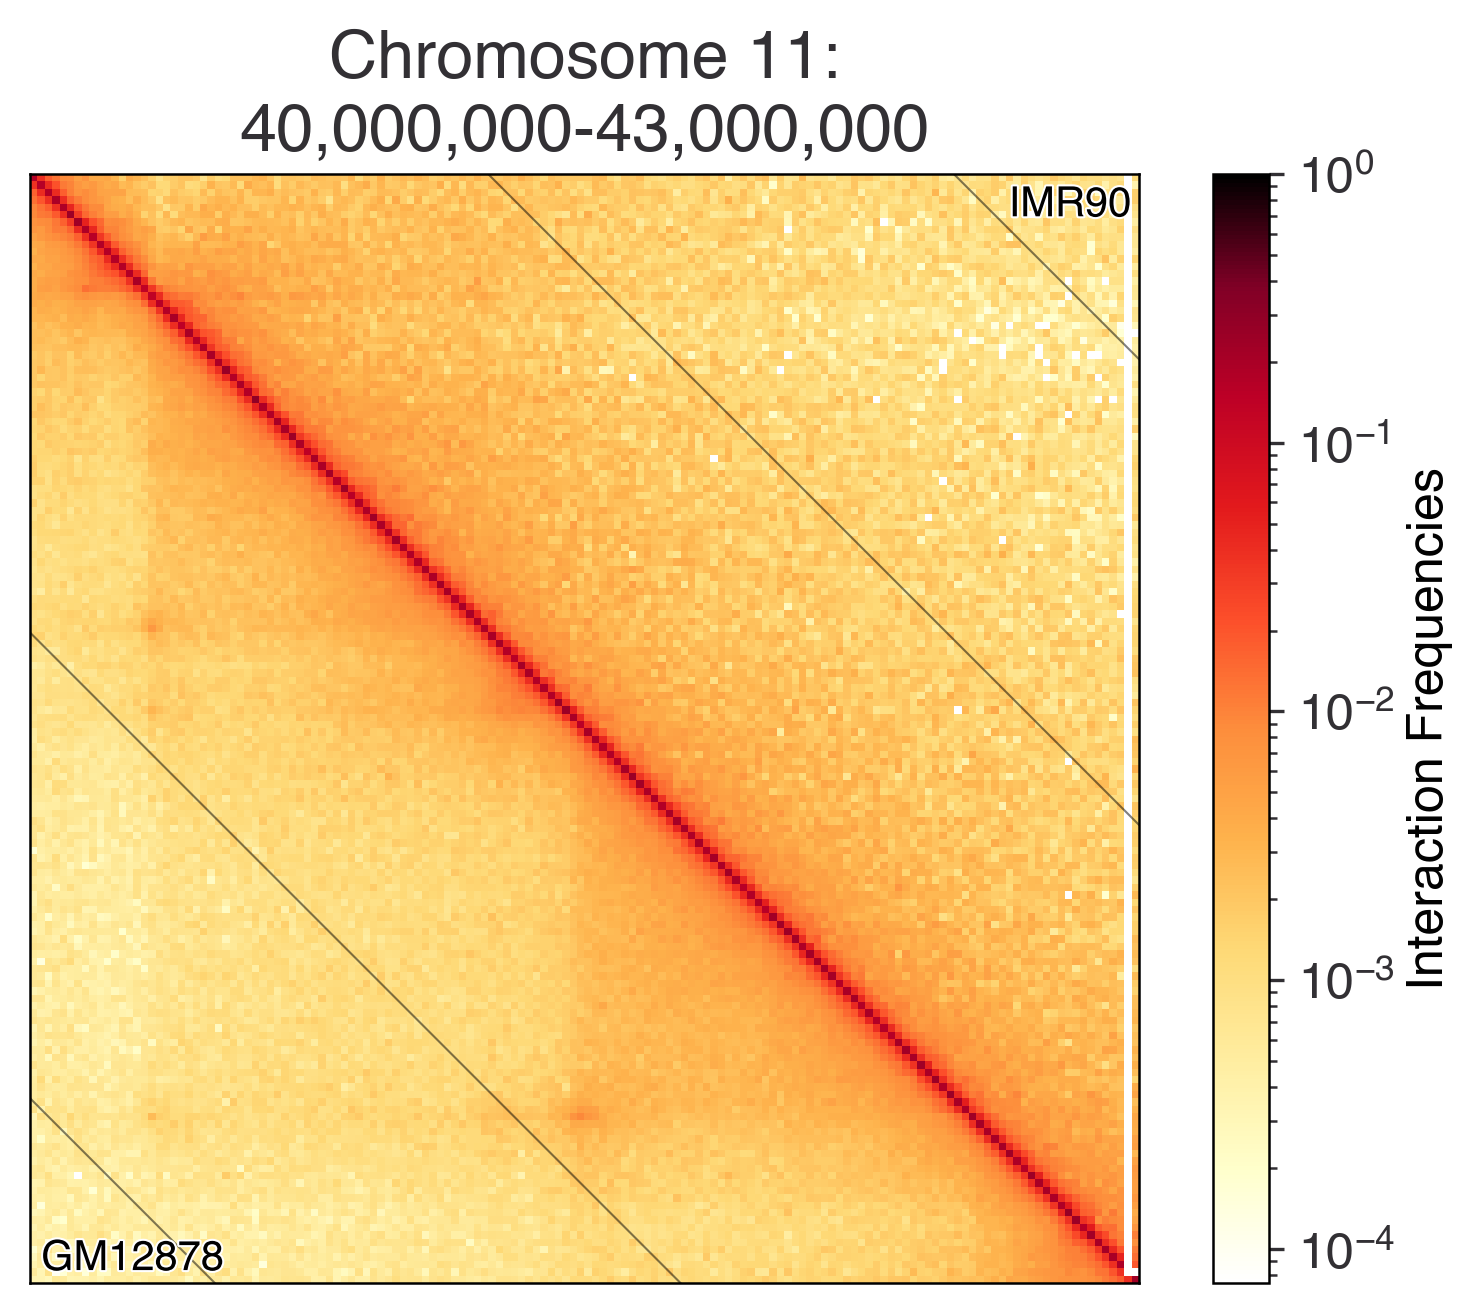

In [6]:
fig, ax, im, cbar = mc(chrom='11',start_idx=40_000_000,region_length=3_000_000)#5_000_000)

lims = ax.get_xlim()
length = lims[-1]

alpha=.5
linewidth=.5
color = 'k'
ax.plot([0,length-1_256_000//20_000],[1_256_000//20_000,length],color=color,alpha=alpha,linewidth=linewidth)
ax.plot([1_256_000//20_000,length],[0,length-1_256_000//20_000],color=color,alpha=alpha,linewidth=linewidth)

ax.plot([0,length-2*1_256_000//20_000],[2*1_256_000//20_000,length],color=color,alpha=alpha,linewidth=linewidth)
ax.plot([2*1_256_000//20_000,length],[0,length-2*1_256_000//20_000],color=color,alpha=alpha,linewidth=linewidth)

ax.set_xlim(lims)
ax.set_ylim(lims[-1::-1])


(64.0, 0.0)

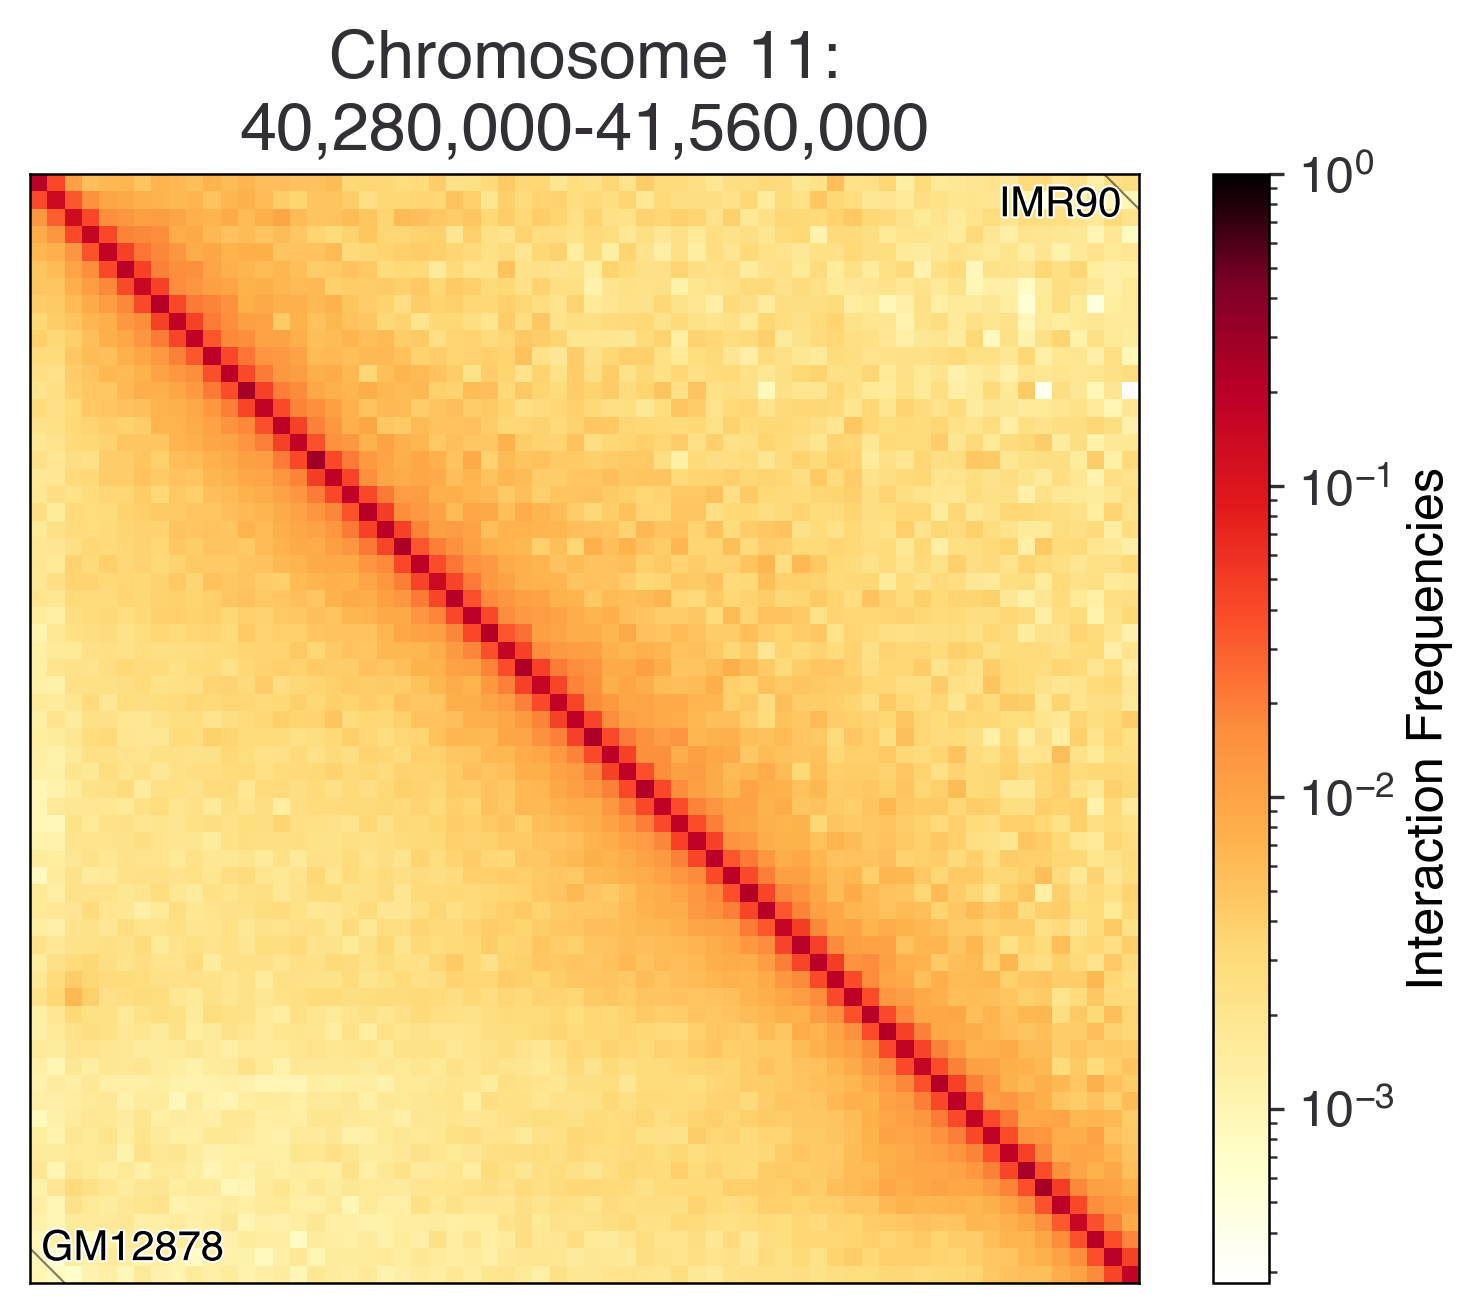

In [16]:
'''
Keep:
2060
'''
i = 2005
s = (i - 1991)*20_000 + 40_000_000
fig, ax, im, cbar = mc(chrom='11',start_idx=s)#,region_length=5_000_000)

lims = ax.get_xlim()
length = lims[-1]

alpha=.5
linewidth=.5
color = 'k'
ax.plot([0,length-1_256_000//20_000],[1_256_000//20_000,length],color=color,alpha=alpha,linewidth=linewidth)
ax.plot([1_256_000//20_000,length],[0,length-1_256_000//20_000],color=color,alpha=alpha,linewidth=linewidth)

ax.plot([0,length-2*1_256_000//20_000],[2*1_256_000//20_000,length],color=color,alpha=alpha,linewidth=linewidth)
ax.plot([2*1_256_000//20_000,length],[0,length-2*1_256_000//20_000],color=color,alpha=alpha,linewidth=linewidth)

ax.set_xlim(lims)
ax.set_ylim(lims[-1::-1])


In [5]:
PERFORMED=False

In [6]:
'''
import matplotlib as mpl

if not PERFORMED:
    PERFORMED=True
    scale = 130_000_000 / 4_500_000#3_000_000
    mpl.rcParams['figure.figsize'] = (scale*7.2,scale*4.45)
    '#''
    mpl.rcParams['xtick.labelsize'] = scale * mpl.rcParams['xtick.labelsize']
    mpl.rcParams['ytick.labelsize'] = scale * mpl.rcParams['ytick.labelsize']
    mpl.rcParams['font.size'] = scale * mpl.rcParams['font.size']
    mpl.rcParams['axes.titlesize'] = scale * mpl.rcParams['axes.titlesize']
    mpl.rcParams['axes.labelsize'] = scale * mpl.rcParams['axes.labelsize']
    mpl.rcParams['lines.linewidth'] = scale * mpl.rcParams['lines.linewidth']
    mpl.rcParams['lines.markersize'] = scale * mpl.rcParams['lines.markersize']
    mpl.rcParams['legend.fontsize'] = scale * mpl.rcParams['legend.fontsize']
    legend.fontsize
    '#''
'''


fig, ax, im, cbar = mc(chrom='11')

lims = ax.get_xlim()
length = lims[-1]

alpha=.5
linewidth=.5 * (3_000_000 / 130_000_000)
color = 'k'
ax.plot([0,length-1_256_000//20_000],[1_256_000//20_000,length],color=color,alpha=alpha,linewidth=linewidth)
ax.plot([1_256_000//20_000,length],[0,length-1_256_000//20_000],color=color,alpha=alpha,linewidth=linewidth)

ax.plot([0,length-2*1_256_000//20_000],[2*1_256_000//20_000,length],color=color,alpha=alpha,linewidth=linewidth)
ax.plot([2*1_256_000//20_000,length],[0,length-2*1_256_000//20_000],color=color,alpha=alpha,linewidth=linewidth)

ax.set_xlim(lims)
ax.set_ylim(lims[-1::-1])

plt.close(fig)


In [7]:
#fig.savefig('GM_vs_IMR_chrom_11.pdf')
fig.savefig('GM_vs_IMR_chrom_11.png',dpi=1_000)

In [5]:
dd = HiCDataset('../../data/outside/IMR90_hg19.mcool',resolution=5_000)

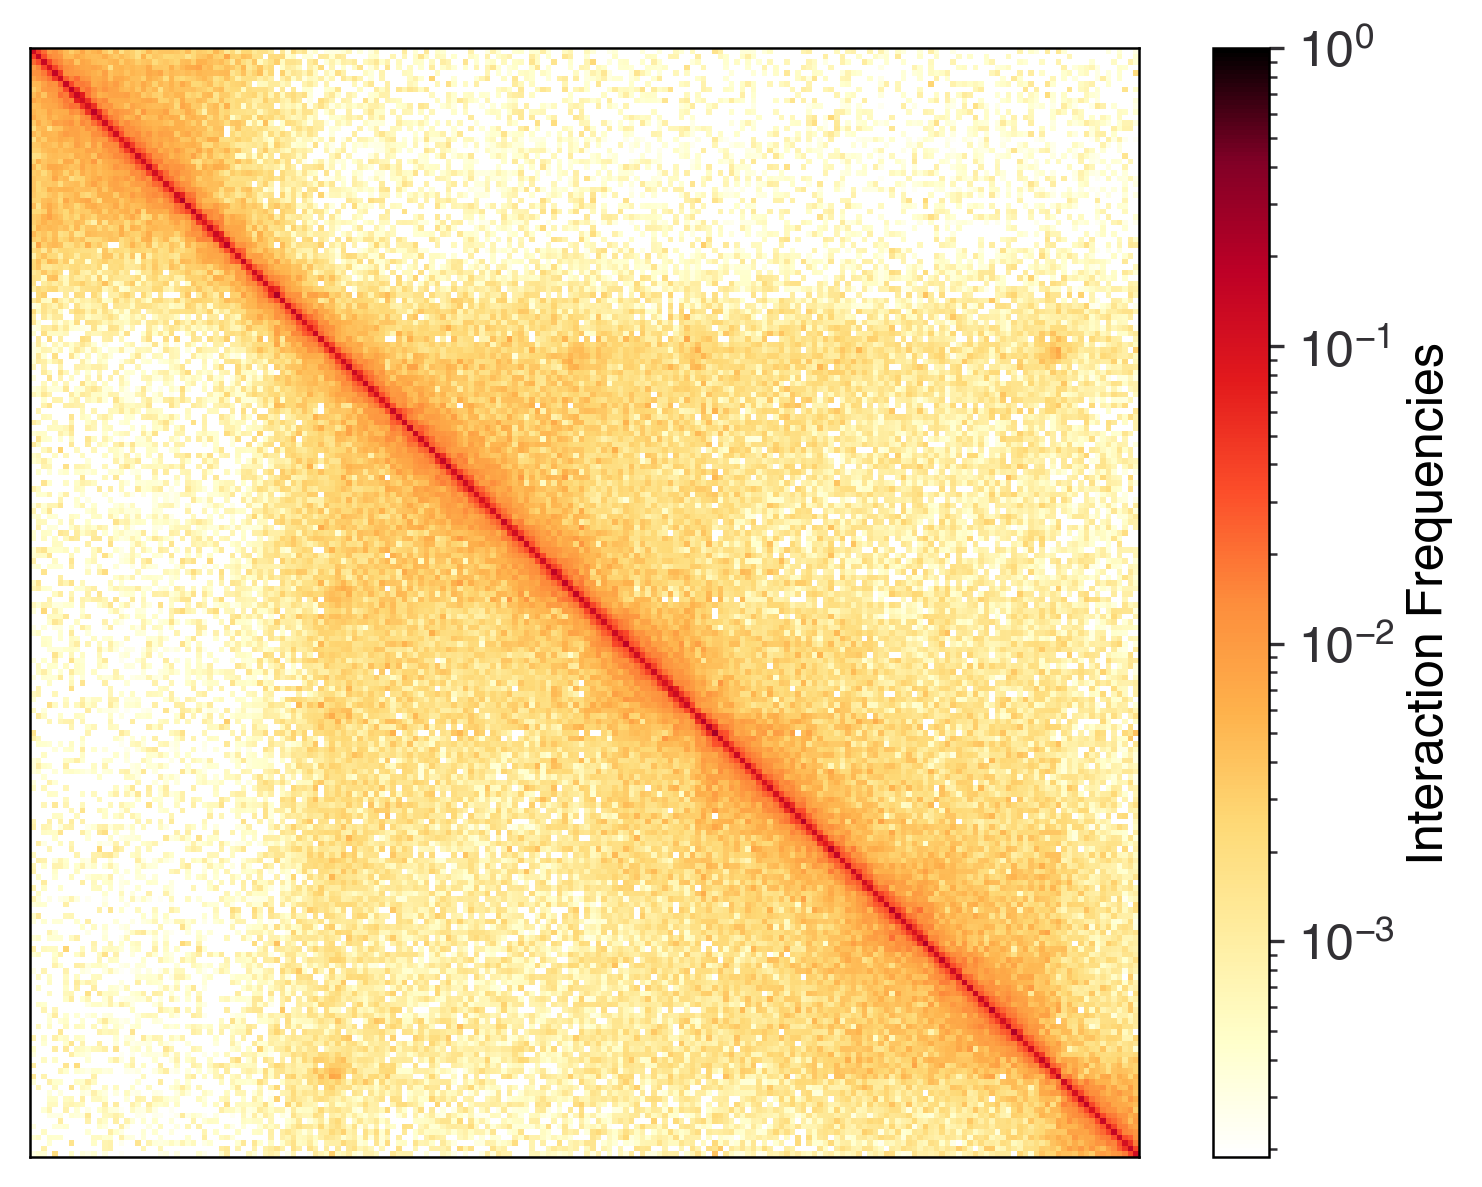

In [11]:
chrom='1'
start_idx=100_000_000
stop=101_000_000
balance=True
adaptive_coarsegraining=False
adaptive_coarsegraining_cutoff=3
adaptive_coarsegraining_max_levels=8
interp_nans=False
fig, ax, im, cbar = dd.fetch(
    chrom,
    start_idx,
    stop,
    balance,
    adaptive_coarsegraining,
    adaptive_coarsegraining_cutoff,
    adaptive_coarsegraining_max_levels,
    interp_nans
).plot()

In [4]:
mc = MapCompare(resolution=5_000)

(600.0, 0.0)

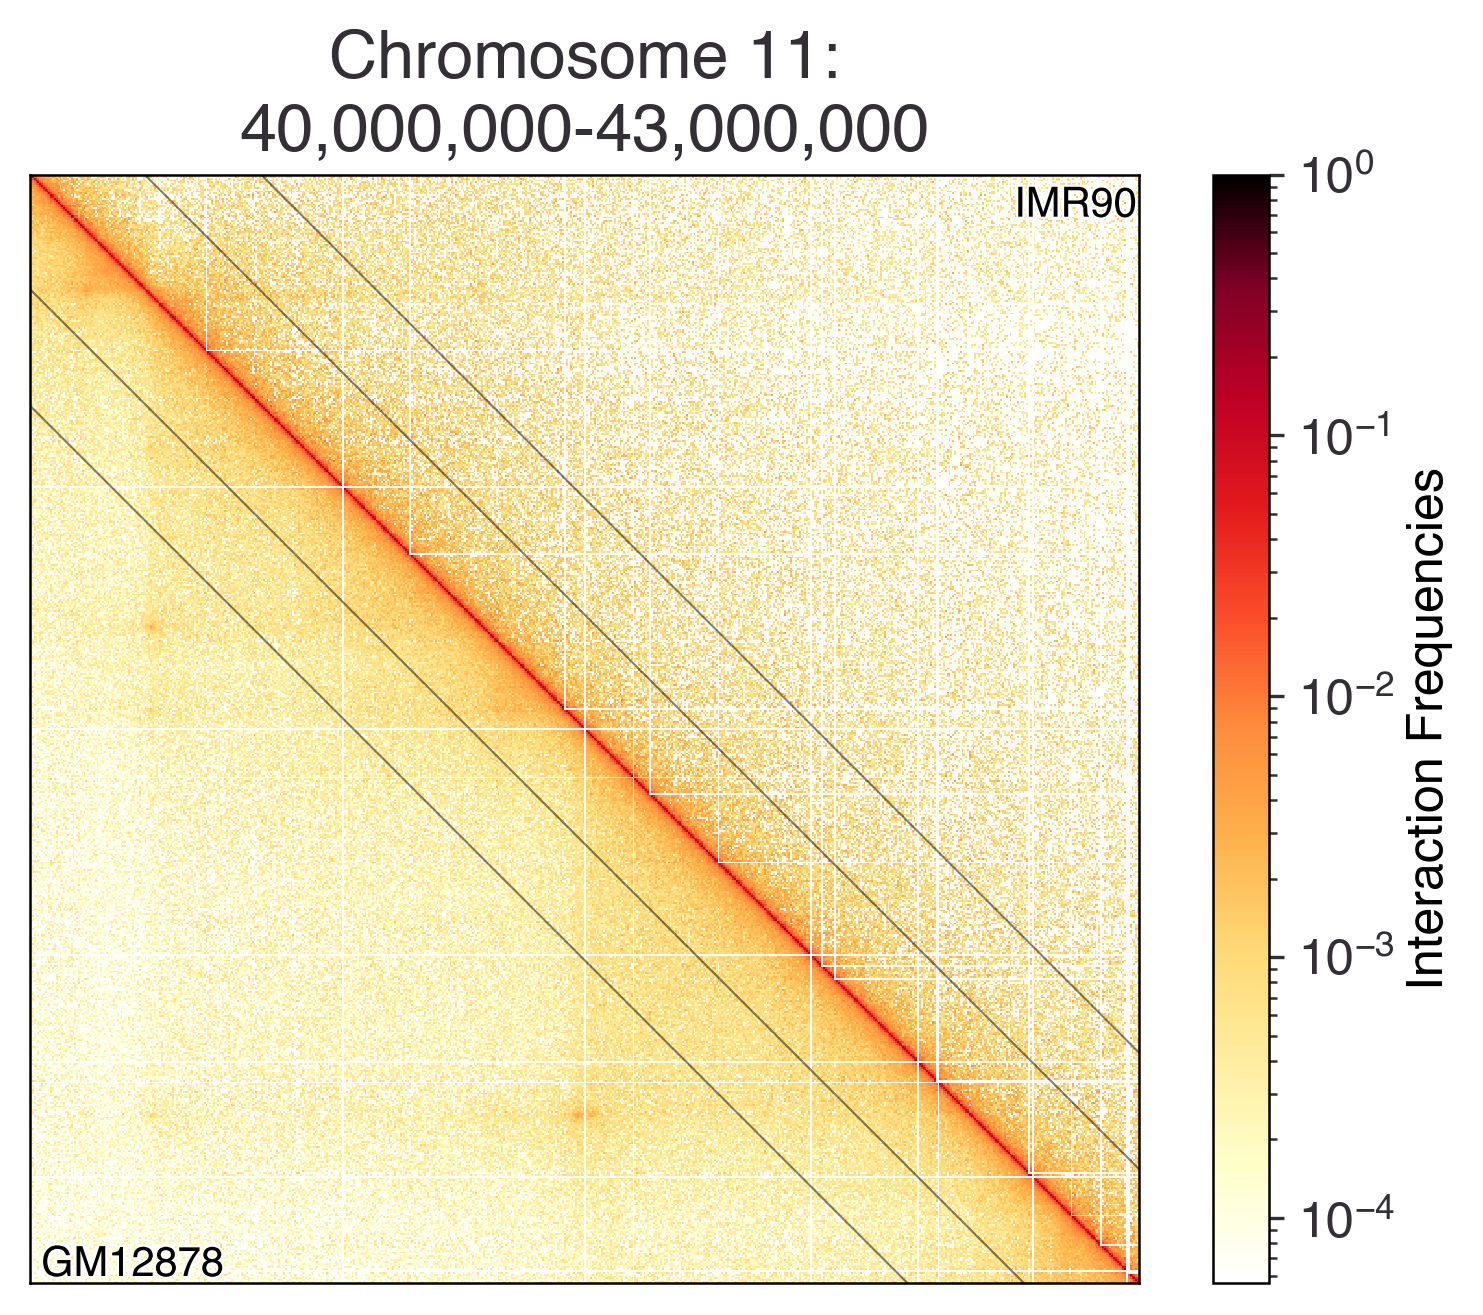

In [5]:
fig, ax, im, cbar = mc(chrom='11',start_idx=40_000_000,region_length=3_000_000)#5_000_000)

lims = ax.get_xlim()
length = lims[-1]

alpha=.5
linewidth=.5
color = 'k'
ax.plot([0,length-1_256_000//20_000],[1_256_000//20_000,length],color=color,alpha=alpha,linewidth=linewidth)
ax.plot([1_256_000//20_000,length],[0,length-1_256_000//20_000],color=color,alpha=alpha,linewidth=linewidth)

ax.plot([0,length-2*1_256_000//20_000],[2*1_256_000//20_000,length],color=color,alpha=alpha,linewidth=linewidth)
ax.plot([2*1_256_000//20_000,length],[0,length-2*1_256_000//20_000],color=color,alpha=alpha,linewidth=linewidth)

ax.set_xlim(lims)
ax.set_ylim(lims[-1::-1])


In [9]:
map=mc.gm.fetch(chrom='11',start=40_000_000,stop=43_000_000)
map2=mc.gm.fetch(chrom='11')

In [10]:
data = map.prob_map
ref_data = map2.prob_map

In [12]:
n = data.shape[-1]
N = ref_data.shape[-1]
for i in range(n):
    norm = ref_data[range(i,N),range(N-i)]
    norm = norm[norm.isfinite()].mean()
    data[range(i,n),range(n-i)]/= norm
    data[range(n-i),range(i,n)]/= norm

In [13]:
from HiCMap import HiCMap
normed_map = HiCMap(data)

(<Figure size 1920x1440 with 2 Axes>,
 <Axes: >,
 <matplotlib.colorbar.Colorbar at 0x7f8ccc3fbd00>)

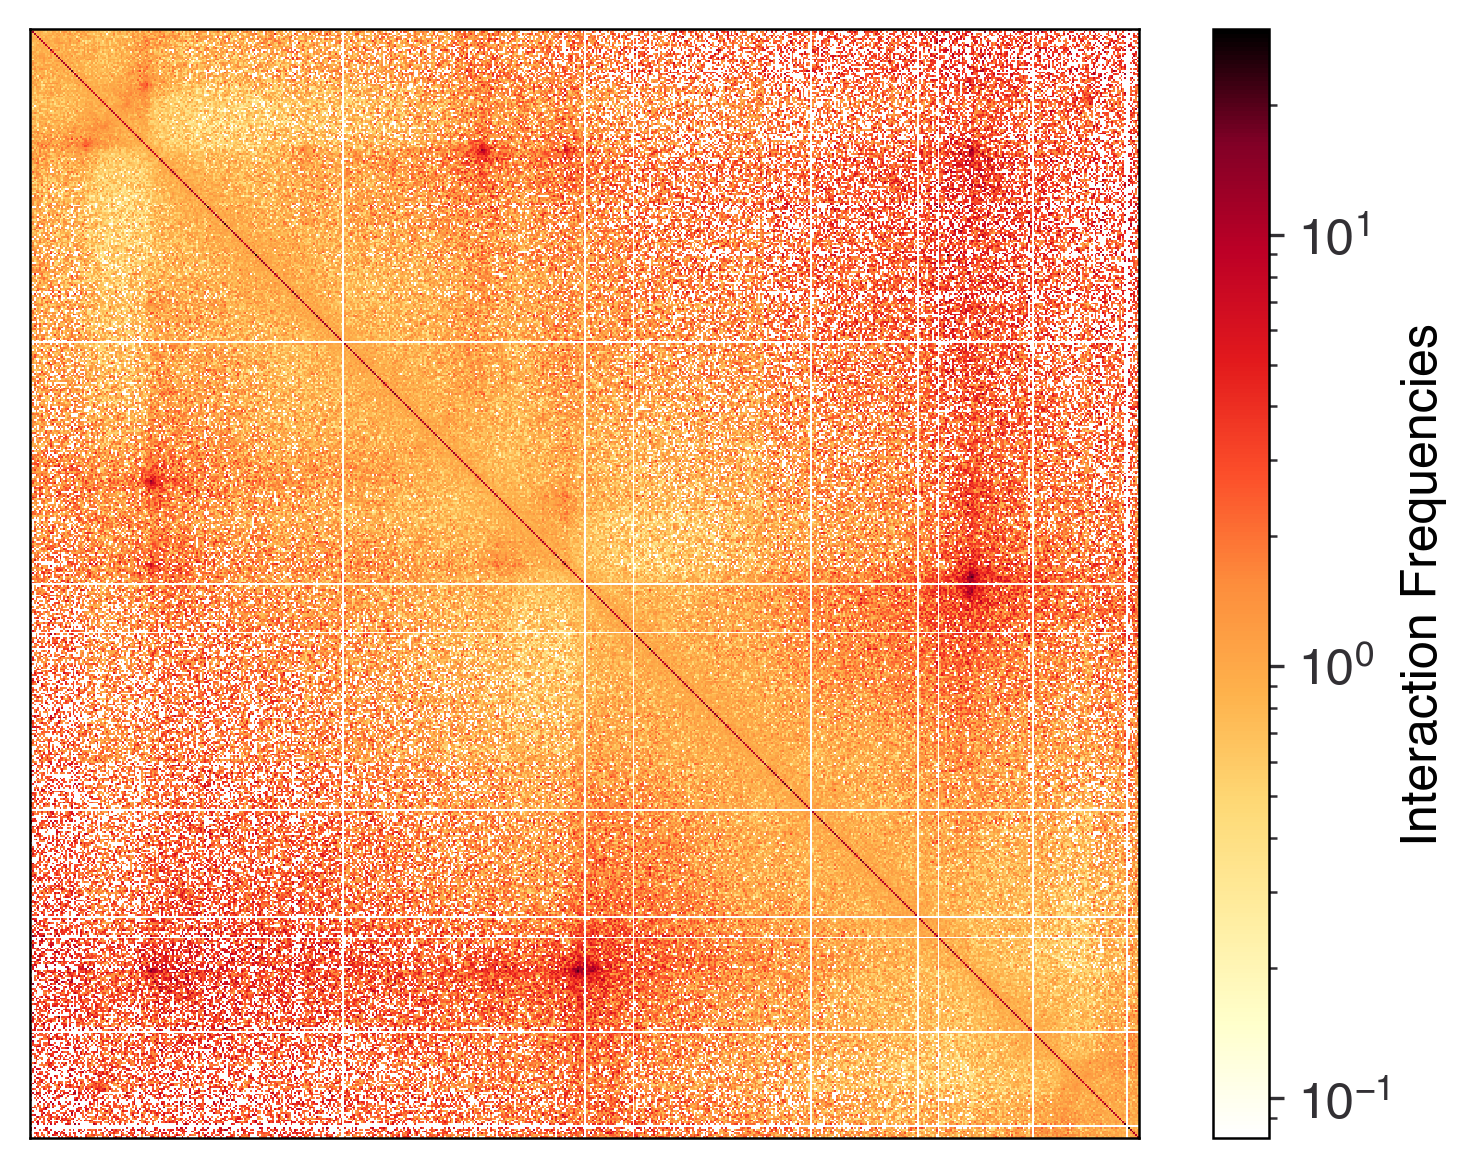

In [17]:
normed_map.plot(vmax=data[data.isfinite()].max())

(<Figure size 1920x1440 with 2 Axes>,
 <Axes: >,
 <matplotlib.colorbar.Colorbar at 0x7f8cc46a3dc0>)

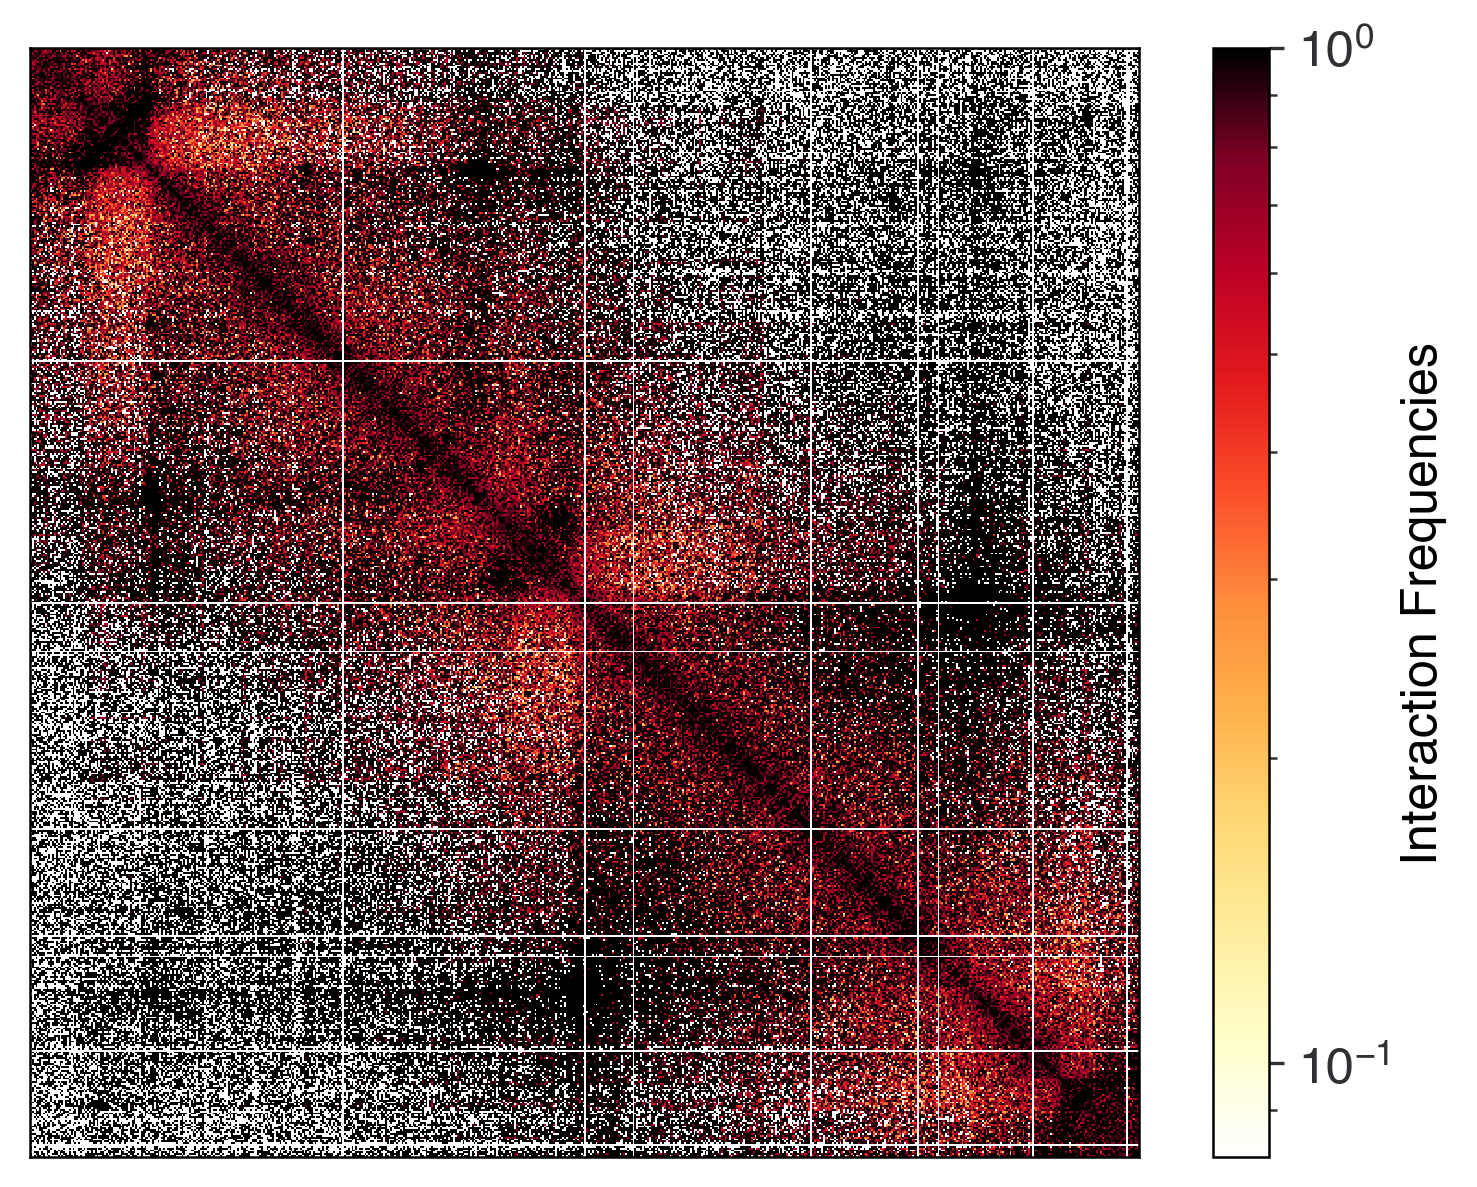

In [19]:
normed_map.plot(vmax=1)

In [2]:
import os
os.listdir('./')

['dist_maps_processed.pt',
 'HiC',
 'RMSD.ipynb',
 'GM_vs_IMR90_chrom_11.py',
 'full_GM_map.py',
 'OrigamiTransform.ipynb',
 'distance_statistics',
 'Repaint',
 'figure_coords.pt',
 'Repaint.ipynb',
 'DistanceStatistics.ipynb',
 'short_for_talk',
 'GM_vs_IMR90.ipynb',
 '.ipynb_checkpoints',
 'HiC.ipynb',
 'DistanceStatistics']